In [94]:
# importing major libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# additional libraries
import warnings
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv('LA4Schools_clean.csv')

In [96]:
pd.set_option('display.max_columns',None)
df.head()

,StudentID,TextLevel-01-SOY,TextLevel-01-MOY,TextLevel-01-EOY,TextLevel-02-SOY,TextLevel-02-MOY,TextLevel-02-EOY,WritingVocab-01-SOY,HRSIW-01-SOY,Counting-01,Counting-02,Place Value-01,Place Value-02,Addition and Subtraction-01,Addition and Subtraction-02,Multiplication and Division-01,Multiplication and Division-02,Kinder_Age,Gender,Disability_Non-disable,Disability_Cognitive,Disability_Physical,Disability_Sensory,Disability_SocialEmotional,NCCD-Funded,NumSibling,SiblingOrder,01.SES,02.SES,NumAbvYear9,NumAbvDiploma,NumProf,Year_02,At_Risk_Numeracy
0,384710734,16,18,25,25,30,32,20,49,4,5,2,2,2,4,2,2,5.493151,1,1,0,0,0,0,0,3,3,104,104,2,1,2,2020,False
1,504699264,8,12,17,19,18,21,40,37,2,1,1,1,2,3,0,2,5.775342,0,1,0,0,0,0,0,2,2,112,112,2,2,2,2018,False
2,332227462,8,12,18,18,23,22,6,30,2,1,1,2,2,1,2,1,5.923288,1,1,0,0,0,0,0,2,2,120,109,2,0,0,2021,False
3,245262793,11,16,25,27,26,31,41,30,2,3,1,2,1,5,2,2,5.695890,1,1,0,0,0,0,0,2,1,95,93,0,0,0,2021,False
4,331173944,9,12,17,21,24,26,26,32,2,4,2,2,2,4,1,1,5.764384,1,1,0,0,0,0,0,1,1,98,98,2,0,0,2021,False


In [97]:
# understanding student population
# dividing data into subgroups
df.columns
student_population = ['StudentID','Kinder_Age', 'Gender',
       'Disability_Non-disable', 'Disability_Cognitive', 'Disability_Physical',
       'Disability_Sensory', 'Disability_SocialEmotional', 'NCCD-Funded',
       'NumSibling', 'SiblingOrder','01.SES',	'02.SES','At_Risk_Numeracy']
student_pop = df.loc[:,student_population]
student_pop.to_csv('student_population.csv')
student_pop.head()

,StudentID,Kinder_Age,Gender,Disability_Non-disable,Disability_Cognitive,Disability_Physical,Disability_Sensory,Disability_SocialEmotional,NCCD-Funded,NumSibling,SiblingOrder,01.SES,02.SES,At_Risk_Numeracy
0,384710734,5.493151,1,1,0,0,0,0,0,3,3,104,104,False
1,504699264,5.775342,0,1,0,0,0,0,0,2,2,112,112,False
2,332227462,5.923288,1,1,0,0,0,0,0,2,2,120,109,False
3,245262793,5.695890,1,1,0,0,0,0,0,2,1,95,93,False
4,331173944,5.764384,1,1,0,0,0,0,0,1,1,98,98,False


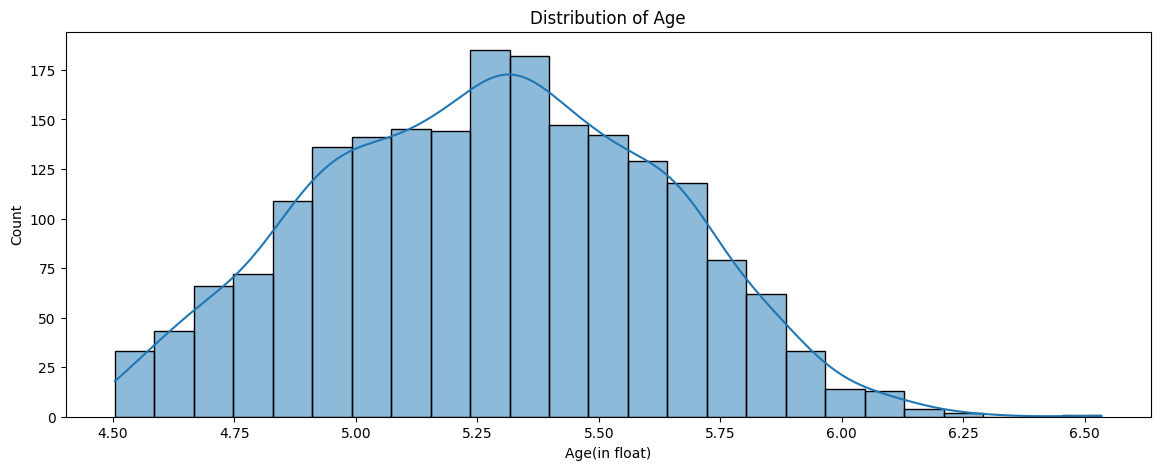

In [98]:
# distribution of Age
plt.figure(figsize=(14,5))
sns.histplot(data=student_pop,x='Kinder_Age',kde=True)
plt.xlabel('Age(in float)')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

- Graph is roughly Bell Shaped.
- Graph is peaking around 5.2 and 5.3.
- Age Range is 4.5 to 5.50, which is normal kindergarten age.
- Slight right skew suggest some students started kindergarten late.


<Figure size 1400x500 with 0 Axes>

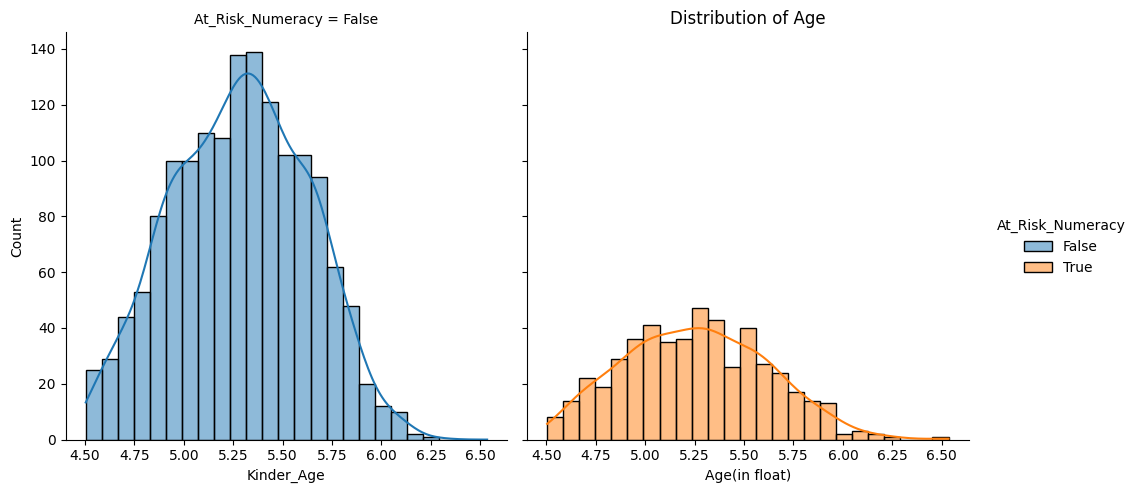

In [99]:
plt.figure(figsize=(14,5))
sns.displot(data=student_pop,x='Kinder_Age',kde=True,col='At_Risk_Numeracy',hue='At_Risk_Numeracy')
plt.xlabel('Age(in float)')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

- The histogram visually suggests younger students might be more at risk

In [100]:
student_pop.Kinder_Age[student_pop.At_Risk_Numeracy==True].var()
student_pop.Kinder_Age[student_pop.At_Risk_Numeracy==False].var()
# both have almost similar variance
at_risk =student_pop.Kinder_Age[student_pop.At_Risk_Numeracy==True]
not_at_risk = student_pop.Kinder_Age[student_pop.At_Risk_Numeracy==False]

from scipy.stats import ttest_ind
T_stats, p_value = ttest_ind(at_risk,not_at_risk)
print('P-Value\t\t',p_value)
print('T-Statistics\t',T_stats)

# There is no statistically significant difference in average age between students who are at risk and not at risk in numeracy.
print('-'*100)
print(f'Since {p_value} is greater than 0.05, we fail to reject the null hypothesis')
print('There is no statistically significant difference in average age between students who are at risk and not at risk in numeracy.')

P-Value		 0.12052258810727359
T-Statistics	 -1.5532466807443983
----------------------------------------------------------------------------------------------------
Since 0.12052258810727359 is greater than 0.05, we fail to reject the null hypothesis
There is no statistically significant difference in average age between students who are at risk and not at risk in numeracy.


<Figure size 1400x500 with 0 Axes>

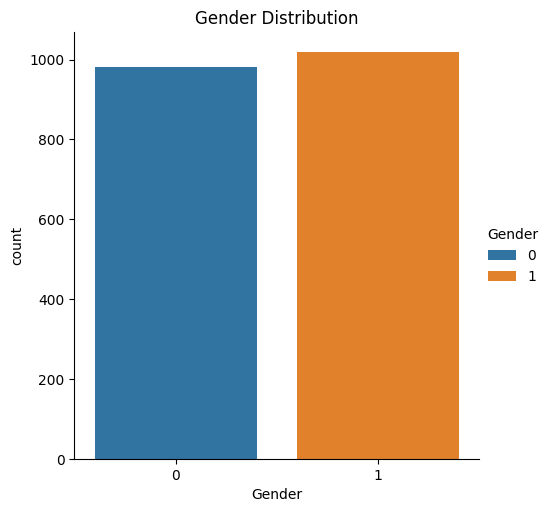

In [101]:
# gender distribution
plt.figure(figsize=(14,5))
sns.catplot(data=student_pop, x='Gender',hue='Gender',kind='count')
plt.title('Gender Distribution')
plt.show()

- Nearly balanced distribution of gender, with roughly equal numbers of students represented across both categories.
- Reduces the chance of Gender Bias in Model

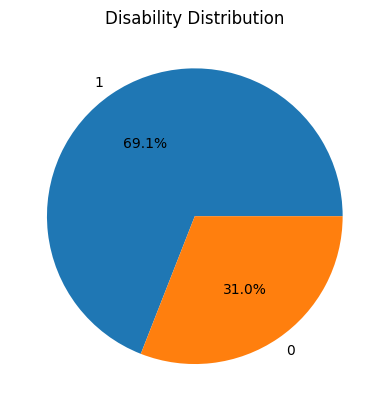

,count
Disability_Non-disable,
1,1381
0,619


In [102]:
plt.pie(student_pop['Disability_Non-disable'].value_counts(),
        labels=student_pop['Disability_Non-disable'].value_counts().index,
        autopct='%1.1f%%')
plt.title('Disability Distribution')
plt.show()
student_pop['Disability_Non-disable'].value_counts()

- Almost 1/3 population is disabled

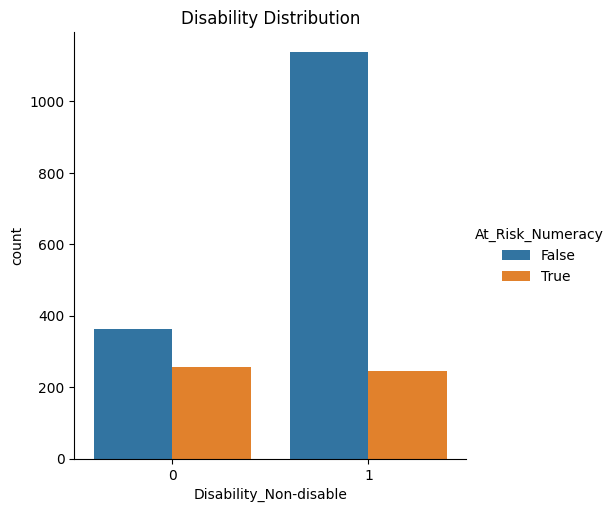

In [103]:
sns.catplot(data=student_pop,x='Disability_Non-disable',hue='At_Risk_Numeracy',kind='count')
plt.title('Disability Distribution')
plt.show()

- Students Non-Disabled :
  + Majority not at risk
  + Smaller portion is at risk
- Students Disabled:
  + Higher portion is at risk
  + The risk numeracy is more balanced, indicating stronger prensence of risk among this grouup

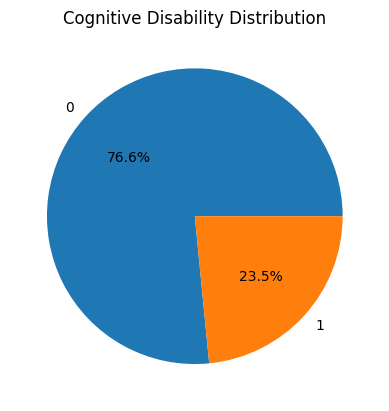

,count
Disability_Cognitive,
0,1531
1,469


In [104]:
plt.pie(student_pop['Disability_Cognitive'].value_counts(),
        labels=student_pop['Disability_Cognitive'].value_counts().index,
        autopct='%1.1f%%')
plt.title('Cognitive Disability Distribution')
plt.show()
student_pop.Disability_Cognitive.value_counts()

- 1 out of 4 students are suffering from Cognitive Disablity

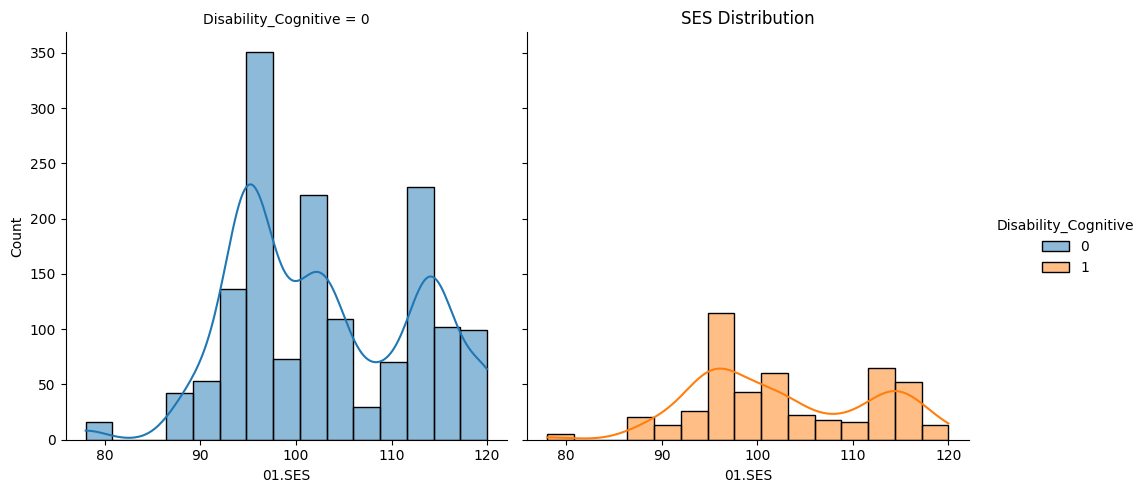

In [105]:
# relation between SES and Cognitive Disablity

sns.displot(data=student_pop,x='01.SES',hue='Disability_Cognitive',col='Disability_Cognitive',kind='hist',kde=True)
plt.title('SES Distribution')
plt.show()

- Graph Suggests nothing better

In [106]:
student_pop[student_pop['Disability_Cognitive'] == 1]['01.SES'].var()
student_pop[student_pop['Disability_Cognitive'] == 0]['01.SES'].var()
# both are almost similar
with_dis = student_pop[student_pop['Disability_Cognitive'] == 1]['01.SES']
without_dis = student_pop[student_pop['Disability_Cognitive'] == 0]['01.SES']

t_stat, p_value = ttest_ind(with_dis, without_dis, equal_var=True)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -0.5822371959135784
P-value: 0.5604726147549075


Since, p-value is greater than 0.05, we fail to reject the null hypothesis.
- the actual difference in SES is not strong enough to be considered meaningful from a statistical standpoint.

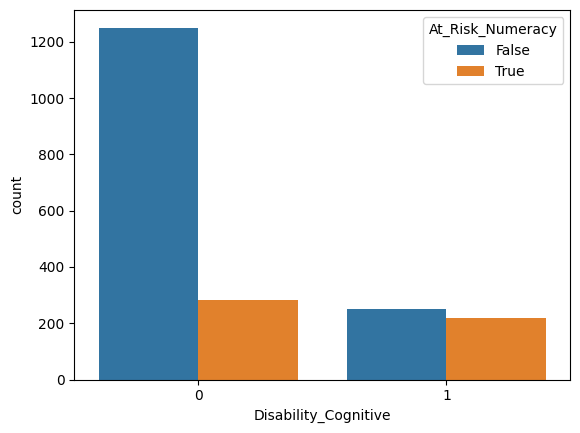

In [107]:
sns.countplot(data=student_pop,x='Disability_Cognitive',hue='At_Risk_Numeracy')
plt.show()

- we can see that student with no cognitive disablity is at low risk
- and students with higher cognitive disablity is at higher risk as the bars of both are identical with each other

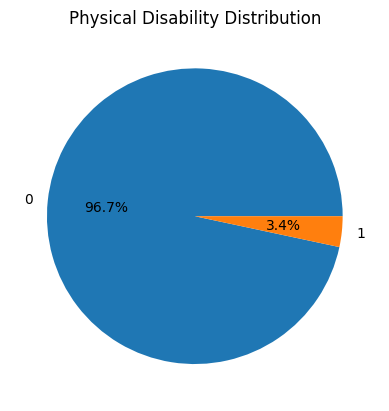

In [108]:
plt.pie(student_pop['Disability_Physical'].value_counts(),
        labels=student_pop['Disability_Physical'].value_counts().index,
        autopct='%1.1f%%')
plt.title('Physical Disability Distribution')
plt.show()

- physical disabilities are relatively rare among the student population, with only 3.4% of students identified as having a physical disability. The remaining 96.7% of students have no reported physical impairments

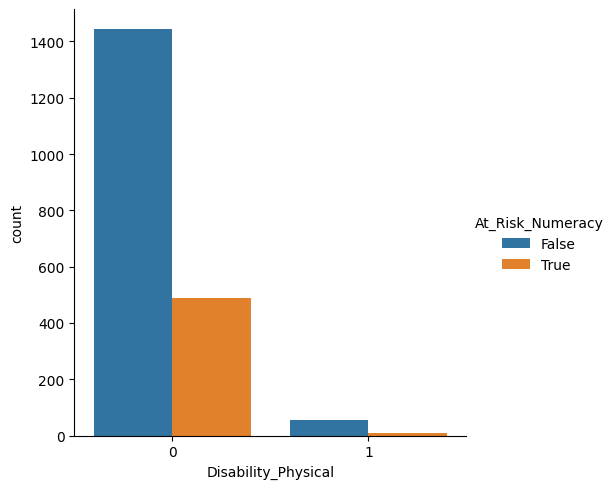

In [109]:
sns.catplot(data=student_pop,x='Disability_Physical',hue='At_Risk_Numeracy',kind='count')
plt.show()

- Plot suggest there is very less chance of students with disablities at risk, but the sample size is small, visual comparision is not enough
- Going forward for chi square test

In [110]:
from scipy.stats import chi2_contingency

cd = pd.crosstab(student_pop['Disability_Physical'],student_pop['At_Risk_Numeracy'],margins=True)
chi_stats, p_value, dof, expected = chi2_contingency(cd)
print('P-Value\t\t',p_value)

P-Value		 0.4405251448906561


- Since, p value is greater than 0.05. We fail to reject the null hypothesis.
- Which means there is no statistically significant association between having a physical disability and being at risk in numeracy in this dataset.

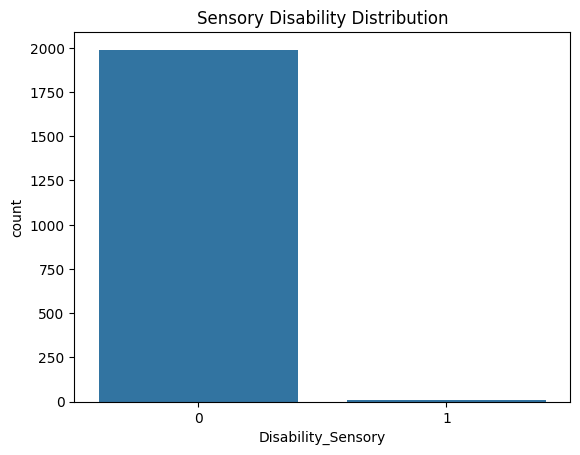

----------------------------------------------------------------------------------------------------


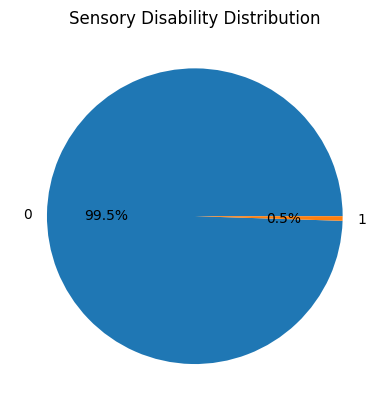

In [111]:
sns.countplot(data=student_pop,x='Disability_Sensory')
plt.title('Sensory Disability Distribution')
plt.show()
print('-'*100)
plt.pie(student_pop['Disability_Sensory'].value_counts(),
        labels=student_pop['Disability_Sensory'].value_counts().index,
        autopct='%1.1f%%')
plt.title('Sensory Disability Distribution')
plt.show()

- This is an extremely rare event in our dataset
- Only ~0.5% of our data belongs to the 1 class → that's around 10 students in 2000 rows
- This feature showcases very less variance and hence it does have very less predictive power

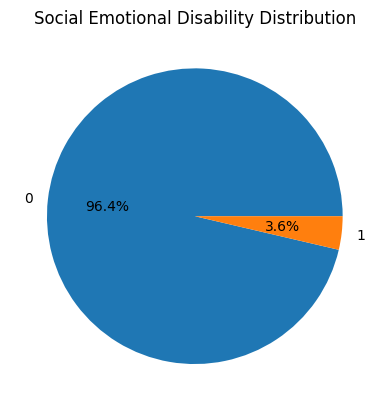

,count
Disability_SocialEmotional,
0,1927
1,73


In [112]:
plt.pie(student_pop.Disability_SocialEmotional.value_counts(),
        labels=student_pop.Disability_SocialEmotional.value_counts().index,
        autopct='%1.1f%%')
plt.title('Social Emotional Disability Distribution')
plt.show()
student_pop.Disability_SocialEmotional.value_counts()

- Highly Imbalanced (96.4% of students are free from social emotional disablity and approx 3.6% students suffer from this)
- Since it is very highly imbalanced it would contribute much to model accuracy
- We need to check wether does it have relation with 'At Risk Numeracy' or not.

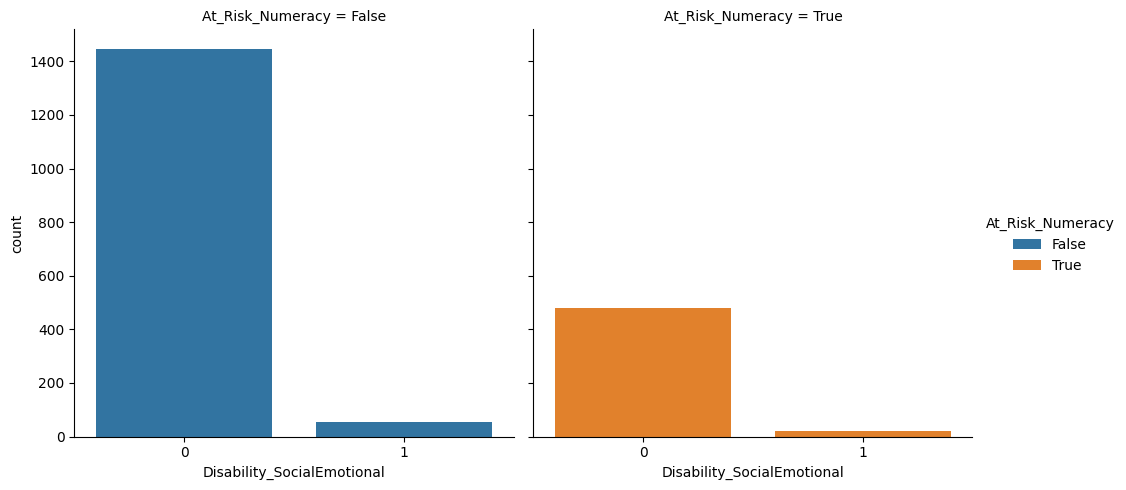

In [113]:
sns.catplot(data=student_pop, x='Disability_SocialEmotional',hue='At_Risk_Numeracy',col='At_Risk_Numeracy',kind='count')
plt.show()

- The graph suggests nothing better
- So, we can drop this column during model building

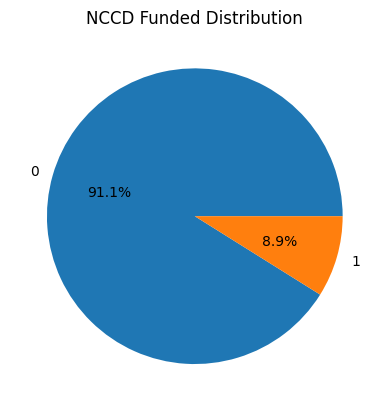

In [114]:
plt.pie(student_pop['NCCD-Funded'].value_counts(),
        labels=student_pop['NCCD-Funded'].value_counts().index,
        autopct='%1.1f%%')
plt.title('NCCD Funded Distribution')
plt.show()

# NCCD FUNDED IS AN IMPORTANT FEATURE FOR MODELING**

- 91.1% of students are not NCCD-funded (0)

- 8.9% are NCCD-funded (1) — meaning they have recognized learning or support needs

,count
NCCD-Funded,
0,442
1,177


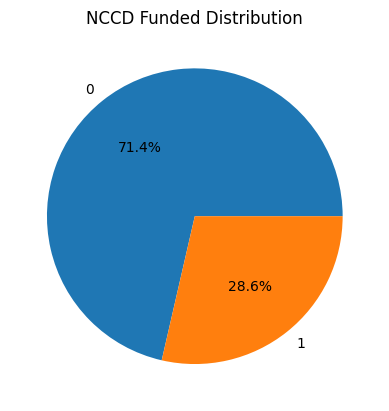

In [115]:
# finding how many students who are considered disabled receive funding from NCCD
student_pop.columns
disabled_student_data = student_pop[student_pop['Disability_Non-disable']==0]

plt.pie(disabled_student_data['NCCD-Funded'].value_counts(),
        labels=disabled_student_data['NCCD-Funded'].value_counts().index,
        autopct='%1.1f%%')
plt.title('NCCD Funded Distribution')
disabled_student_data['NCCD-Funded'].value_counts()

- Not all students with a reported disability are funded under NCCD.

- Only ~1 in 3 disabled students are receiving formal support via NCCD.

### This could suggest:

- Some disabilities might not meet NCCD criteria for support.

- There might be reporting, identification, or resource allocation gaps.

- Schools may be handling some students without formal NCCD processes.

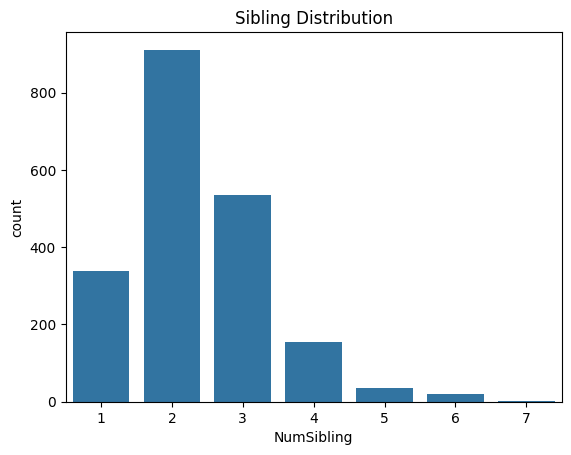

In [116]:
sns.countplot(data=student_pop,x='NumSibling')
plt.title('Sibling Distribution')
plt.show()

- most students have 2 siblings, followed by 3 and 1
- larger the family size, less resources for the family

### During modeling what we can do is we can  distinguish these into sub groups
- Only Child, Small Family (2-3), Large Family (3+)

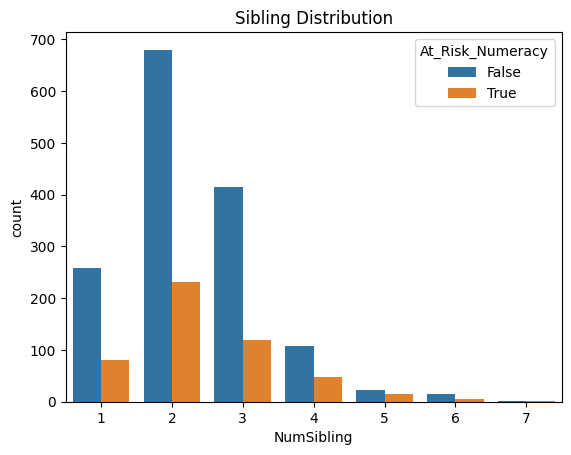

In [117]:
sns.countplot(data=student_pop,x='NumSibling',hue='At_Risk_Numeracy')
plt.title('Sibling Distribution')
plt.show()

- As sibling count increases (3+), the at-risk proportion remains visible, and in some cases (like NumSibling = 3), the orange bar approaches the blue bar

- For larger families (4+ siblings), the risk proportion increases relatively — though sample size becomes small

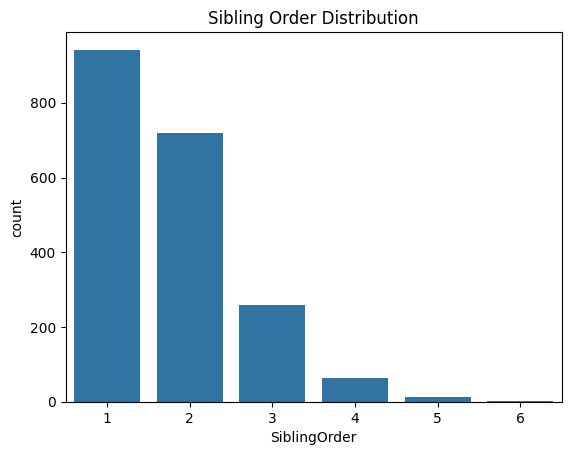

In [118]:
sns.countplot(data=student_pop,x='SiblingOrder')
plt.title('Sibling Order Distribution')
plt.show()

- Majority of students in the dataset are first borns followed by 2nd and 3rd born
- According to birth order theory, first-born children may benefit from increased parental attention, potentially influencing their academic performance

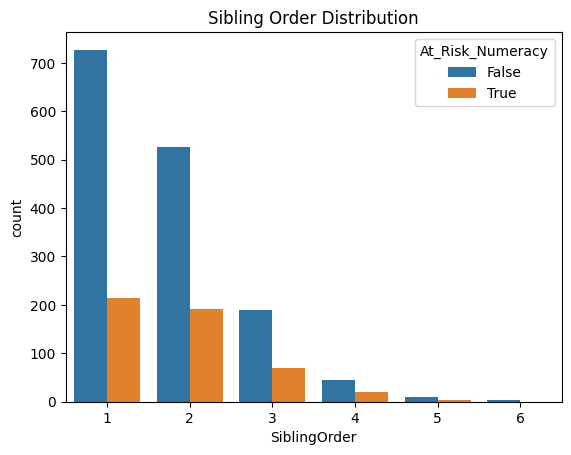

In [119]:
sns.countplot(data=student_pop,x='SiblingOrder',hue='At_Risk_Numeracy')
plt.title('Sibling Order Distribution')
plt.show()

- First-borns (SiblingOrder = 1) are less likely to be at risk — the blue bar (not at risk) is much taller than the orange bar.

- For later-born children (SiblingOrder = 2, 3, 4...), the proportion of students at risk increases relative to their group size

- The numeracy risk gap narrows as birth order increases — especially visible at SiblingOrder = 2 and 3

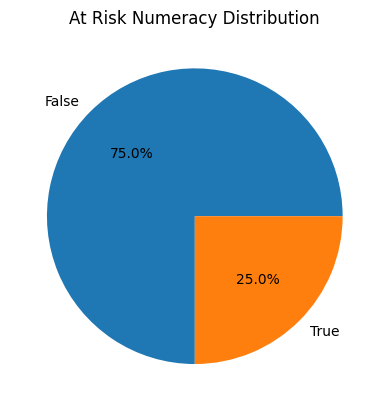

In [120]:
plt.pie(student_pop.At_Risk_Numeracy.value_counts(),labels=student_pop.At_Risk_Numeracy.value_counts().index,autopct='%1.1f%%')
plt.title('At Risk Numeracy Distribution')
plt.show()

Out of the total student population, 25% are considered at risk in numeracy


In [121]:
# df
# understanding student academics
df.columns
academics = ['StudentID', 'TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY',
       'TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY',
       'WritingVocab-01-SOY', 'HRSIW-01-SOY', 'Counting-01', 'Counting-02',
       'Place Value-01', 'Place Value-02', 'Addition and Subtraction-01',
       'Addition and Subtraction-02', 'Multiplication and Division-01',
       'Multiplication and Division-02','Year_02','At_Risk_Numeracy']
academics = df.loc[:,academics]
academics.head()

,StudentID,TextLevel-01-SOY,TextLevel-01-MOY,TextLevel-01-EOY,TextLevel-02-SOY,TextLevel-02-MOY,TextLevel-02-EOY,WritingVocab-01-SOY,HRSIW-01-SOY,Counting-01,Counting-02,Place Value-01,Place Value-02,Addition and Subtraction-01,Addition and Subtraction-02,Multiplication and Division-01,Multiplication and Division-02,Year_02,At_Risk_Numeracy
0,384710734,16,18,25,25,30,32,20,49,4,5,2,2,2,4,2,2,2020,False
1,504699264,8,12,17,19,18,21,40,37,2,1,1,1,2,3,0,2,2018,False
2,332227462,8,12,18,18,23,22,6,30,2,1,1,2,2,1,2,1,2021,False
3,245262793,11,16,25,27,26,31,41,30,2,3,1,2,1,5,2,2,2021,False
4,331173944,9,12,17,21,24,26,26,32,2,4,2,2,2,4,1,1,2021,False


In [122]:
academics.columns
academics.describe()

,StudentID,TextLevel-01-SOY,TextLevel-01-MOY,TextLevel-01-EOY,TextLevel-02-SOY,TextLevel-02-MOY,TextLevel-02-EOY,WritingVocab-01-SOY,HRSIW-01-SOY,Counting-01,Counting-02,Place Value-01,Place Value-02,Addition and Subtraction-01,Addition and Subtraction-02,Multiplication and Division-01,Multiplication and Division-02,Year_02
count,2.000000e+03,2000.000000,2000.000000,2000.0000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.459580e+08,10.718000,15.001500,21.1300,21.786500,24.07300,26.998500,22.018500,30.518000,1.758000,2.850500,1.028500,1.681500,1.290500,2.257500,1.075500,1.797500,2018.640000
std,2.580928e+08,6.067362,5.489496,4.5786,5.220205,4.69134,3.765314,12.679098,9.990174,0.935881,1.072719,0.529932,0.639736,0.935172,1.155795,0.837944,0.771875,1.664568
min,1.006692e+08,0.000000,0.000000,4.0000,2.000000,5.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
25%,3.163839e+08,6.000000,11.000000,18.0000,18.000000,21.00000,25.000000,13.000000,25.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,2017.000000
50%,5.469370e+08,10.000000,14.000000,21.0000,22.000000,24.00000,28.000000,20.000000,32.000000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2018.000000
75%,7.670611e+08,14.000000,18.000000,24.0000,25.000000,28.00000,30.000000,29.000000,37.000000,2.000000,4.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2020.000000
max,9.998723e+08,34.000000,33.000000,34.0000,36.000000,34.00000,33.000000,95.000000,58.000000,5.000000,6.000000,4.000000,5.000000,5.000000,6.000000,4.000000,5.000000,2021.000000


- 'TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY',  'TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY'
we can through our reference file that these columns have scale of 0-31, but we can see that maximum values are upto 36, which could be the possible issue of accuracy or validity
- plan of action, we will clip these values upto 31

In [123]:
academics.columns
# 'TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY',
#        'TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY'

df['TextLevel-01-SOY'] = df['TextLevel-01-SOY'].clip(upper=31)
df['TextLevel-01-MOY'] = df['TextLevel-01-MOY'].clip(upper=31)
df['TextLevel-01-EOY'] = df['TextLevel-01-EOY'].clip(upper=31)
df['TextLevel-02-SOY'] = df['TextLevel-01-SOY'].clip(upper=31)
df['TextLevel-02-MOY'] = df['TextLevel-01-MOY'].clip(upper=31)
df['TextLevel-02-EOY'] = df['TextLevel-01-EOY'].clip(upper=31)

academics = ['StudentID', 'TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY',
       'TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY',
       'WritingVocab-01-SOY', 'HRSIW-01-SOY', 'Counting-01', 'Counting-02',
       'Place Value-01', 'Place Value-02', 'Addition and Subtraction-01',
       'Addition and Subtraction-02', 'Multiplication and Division-01',
       'Multiplication and Division-02','Year_02','At_Risk_Numeracy']
academics = df.loc[:,academics]
academics.head()

,StudentID,TextLevel-01-SOY,TextLevel-01-MOY,TextLevel-01-EOY,TextLevel-02-SOY,TextLevel-02-MOY,TextLevel-02-EOY,WritingVocab-01-SOY,HRSIW-01-SOY,Counting-01,Counting-02,Place Value-01,Place Value-02,Addition and Subtraction-01,Addition and Subtraction-02,Multiplication and Division-01,Multiplication and Division-02,Year_02,At_Risk_Numeracy
0,384710734,16,18,25,16,18,25,20,49,4,5,2,2,2,4,2,2,2020,False
1,504699264,8,12,17,8,12,17,40,37,2,1,1,1,2,3,0,2,2018,False
2,332227462,8,12,18,8,12,18,6,30,2,1,1,2,2,1,2,1,2021,False
3,245262793,11,16,25,11,16,25,41,30,2,3,1,2,1,5,2,2,2021,False
4,331173944,9,12,17,9,12,17,26,32,2,4,2,2,2,4,1,1,2021,False


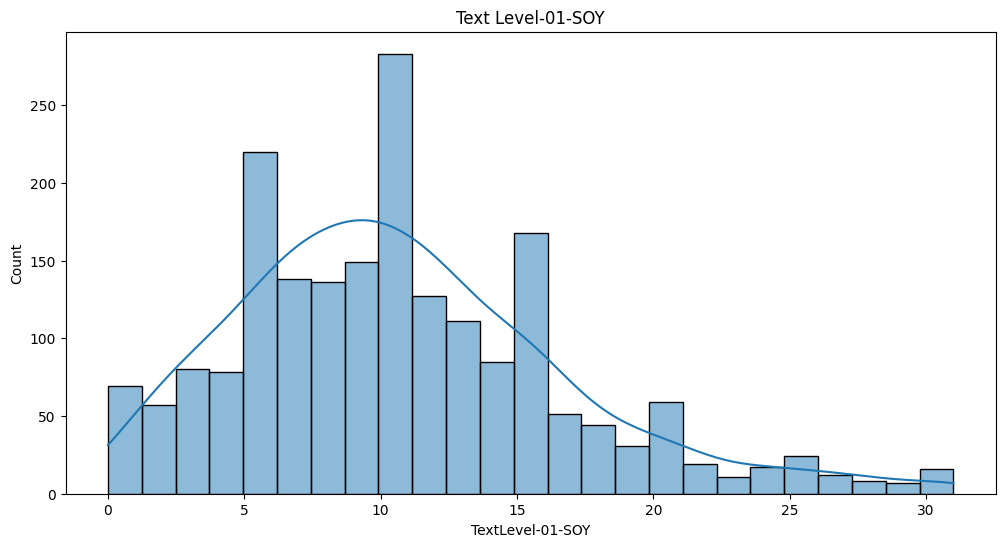

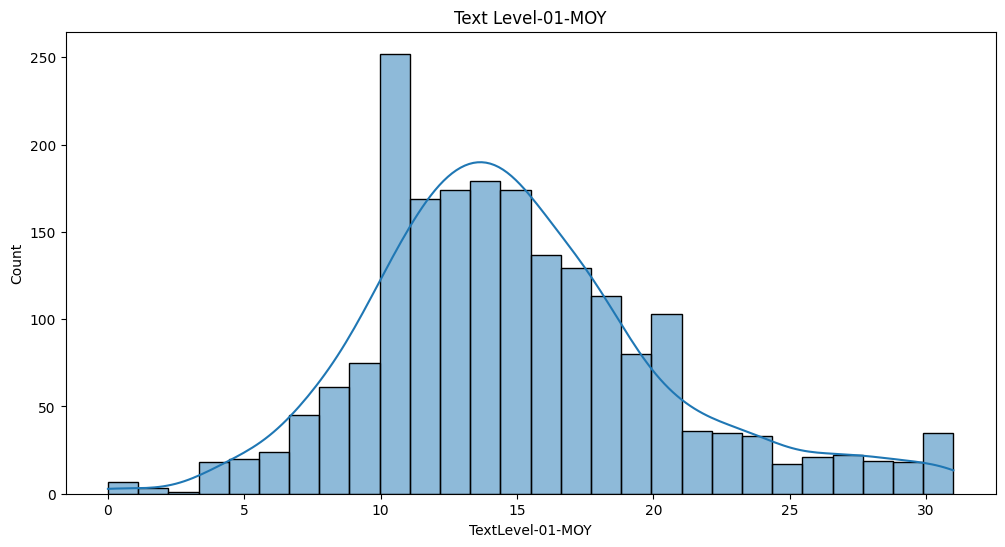

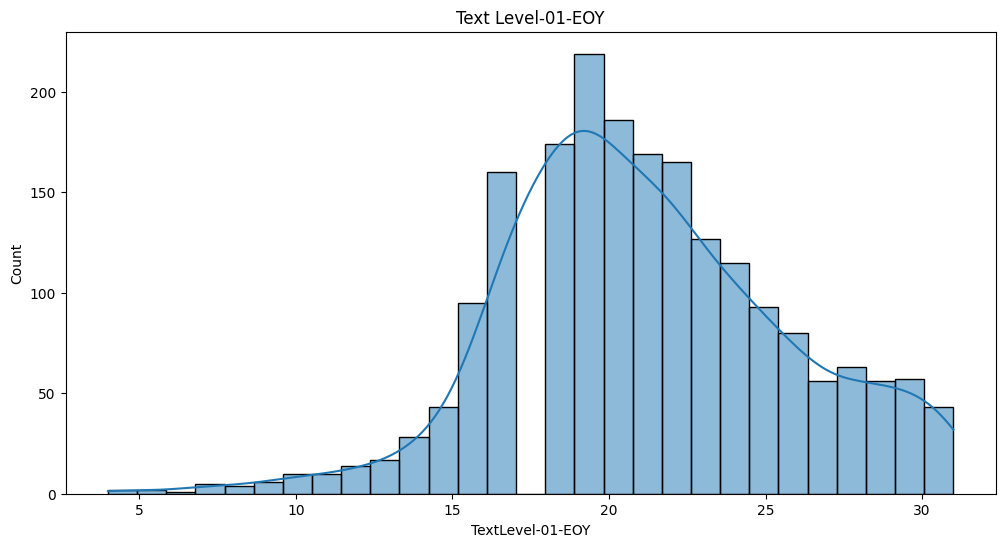

,TextLevel-01-SOY,TextLevel-01-MOY,TextLevel-01-EOY
count,2000.000000,2000.000000,2000.000000
mean,10.714500,14.994500,21.121000
std,6.055024,5.468128,4.557493
min,0.000000,0.000000,4.000000
25%,6.000000,11.000000,18.000000
50%,10.000000,14.000000,21.000000
75%,14.000000,18.000000,24.000000
max,31.000000,31.000000,31.000000


In [124]:
plt.figure(figsize=(12,6))
sns.histplot(data=academics,x='TextLevel-01-SOY',kde=True)
plt.title('Text Level-01-SOY')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(data=academics,x='TextLevel-01-MOY',kde=True)
plt.title('Text Level-01-MOY')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(data=academics,x='TextLevel-01-EOY',kde=True)
plt.title('Text Level-01-EOY')
plt.show()

academics.iloc[:,1:4].describe()


* We observed that the **TextLevel scores at the beginning of the year** are **right-skewed**, indicating that a large portion of students start with lower reading proficiency.
* However, as the year progresses, there is a noticeable improvement: the **median score shifts from around 10 at the start**, to **14 by mid-year**, and further to **21 by the end**.
* This trend highlights a **gradual and consistent improvement** in students' reading abilities over the academic year.


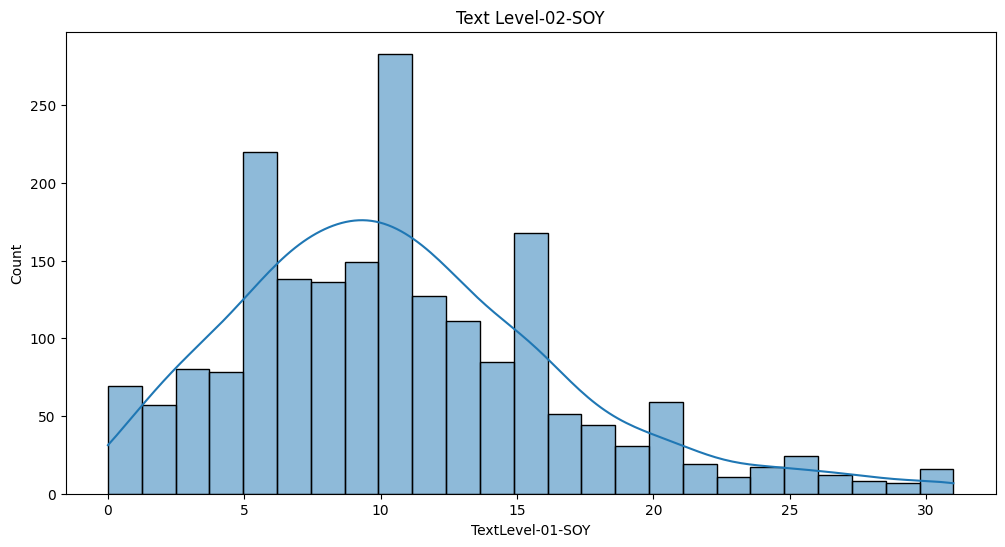

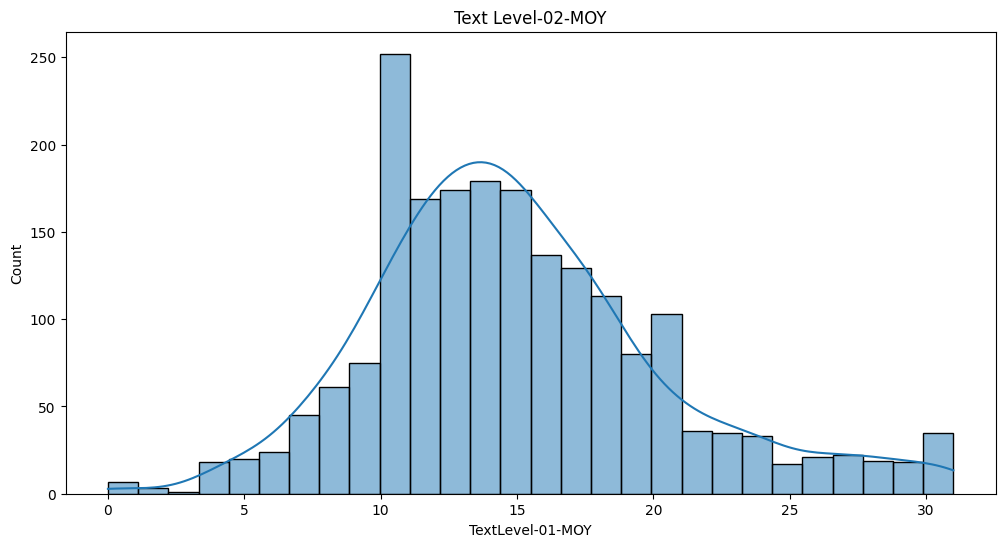

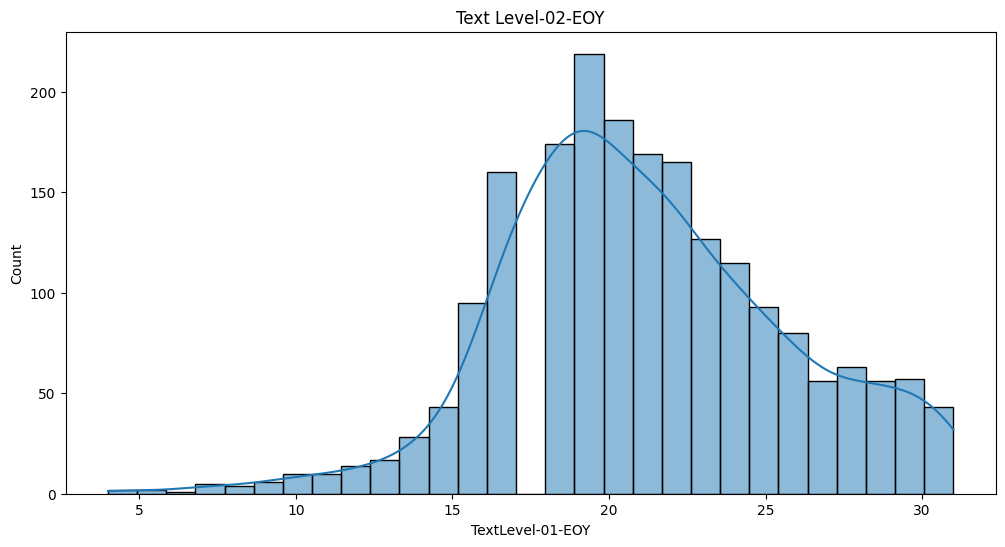

,TextLevel-02-SOY,TextLevel-02-MOY,TextLevel-02-EOY
count,2000.000000,2000.000000,2000.000000
mean,10.714500,14.994500,21.121000
std,6.055024,5.468128,4.557493
min,0.000000,0.000000,4.000000
25%,6.000000,11.000000,18.000000
50%,10.000000,14.000000,21.000000
75%,14.000000,18.000000,24.000000
max,31.000000,31.000000,31.000000


In [125]:
plt.figure(figsize=(12,6))
sns.histplot(data=academics,x='TextLevel-01-SOY',kde=True)
plt.title('Text Level-02-SOY')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(data=academics,x='TextLevel-01-MOY',kde=True)
plt.title('Text Level-02-MOY')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(data=academics,x='TextLevel-01-EOY',kde=True)
plt.title('Text Level-02-EOY')
plt.show()

academics.iloc[:,4:7].describe()

- At the start of Year 2 (SOY), the graph is right-skewed, which means most students had low reading scores. The peak is around 8–10, showing that many students were still struggling in the beginning.

- By the middle of the year (MOY), the distribution starts shifting to the right. The median increases to around 14–15. More students are now reaching decent reading levels, which shows improvement.

- At the end of the year (EOY), the graph looks much more balanced. The peak shifts to around 20, and many students are scoring in the range of 18 to 25. The skewness reduces, and the performance improves overall.

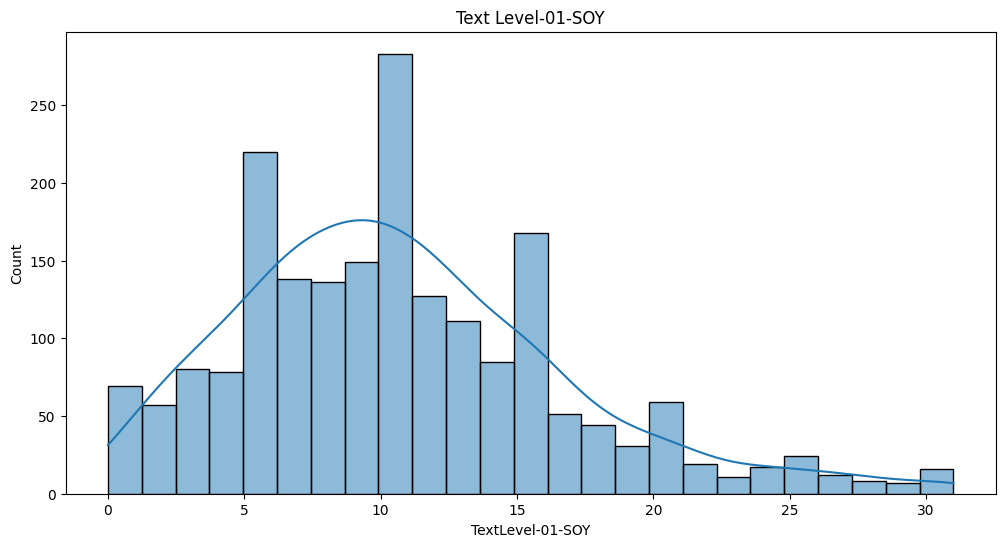

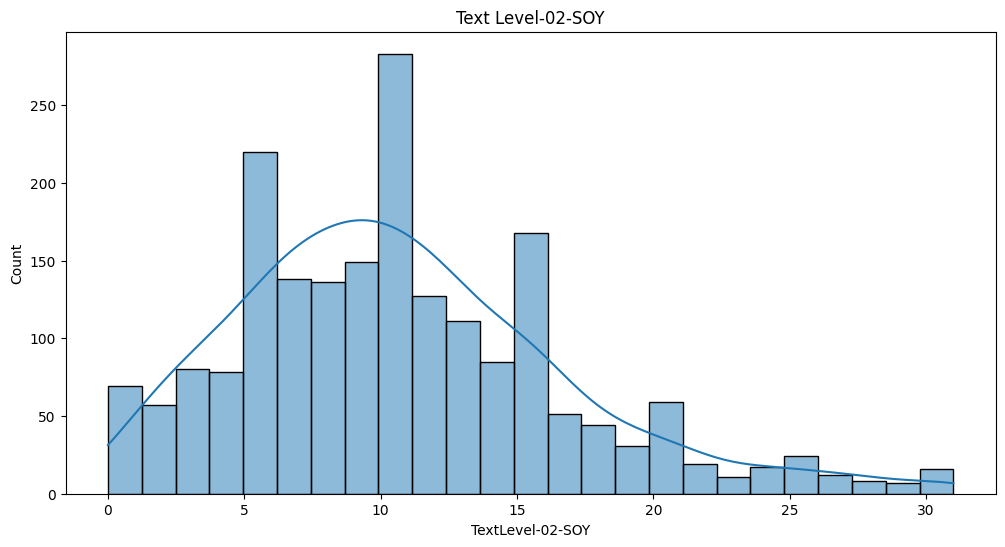

In [126]:
plt.figure(figsize=(12,6))
sns.histplot(data=academics,x='TextLevel-01-SOY',kde=True)
plt.title('Text Level-01-SOY')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(data=academics,x='TextLevel-02-SOY',kde=True)
plt.title('Text Level-02-SOY')
plt.show()

When we compare the start of Year 1 (TextLevel-01-SOY) with the start of Year 2 (TextLevel-02-SOY), we observe that the shape of the distribution remains mostly similar — both are right-skewed, showing that a majority of students begin their school years with lower reading levels.

In [127]:
academics.columns

Index(['StudentID', 'TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY',
       'TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY',
       'WritingVocab-01-SOY', 'HRSIW-01-SOY', 'Counting-01', 'Counting-02',
       'Place Value-01', 'Place Value-02', 'Addition and Subtraction-01',
       'Addition and Subtraction-02', 'Multiplication and Division-01',
       'Multiplication and Division-02', 'Year_02', 'At_Risk_Numeracy'],
      dtype='object')

In [128]:
textlevel_cols = ['TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY',
                  'TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY']
df[textlevel_cols].skew()


,0
TextLevel-01-SOY,0.774113
TextLevel-01-MOY,0.633311
TextLevel-01-EOY,0.042110
TextLevel-02-SOY,0.774113
TextLevel-02-MOY,0.633311
TextLevel-02-EOY,0.042110


In [129]:
academics.columns
avg_mean_year1 = pd.DataFrame(academics.loc[:,['TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY']].mean(),columns=['Average Text Level'])
avg_mean_year2 = pd.DataFrame(academics.loc[:,['TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY']].mean(),columns=['Average Text Level'])
avg_mean_year1['year'] = 'Year 1'
avg_mean_year2['year'] = 'Year 2'
avg_mean_year1['term'] = ['soy','moy','eoy']
avg_mean_year2['term'] = ['soy','moy','eoy']
avg_combined = pd.concat([avg_mean_year1,avg_mean_year2])
avg_combined


,Average Text Level,year,term
TextLevel-01-SOY,10.7145,Year 1,soy
TextLevel-01-MOY,14.9945,Year 1,moy
TextLevel-01-EOY,21.1210,Year 1,eoy
TextLevel-02-SOY,10.7145,Year 2,soy
TextLevel-02-MOY,14.9945,Year 2,moy
TextLevel-02-EOY,21.1210,Year 2,eoy


- TextLevel-01-EOY ->	Approximately Normal
- TextLevel-02-EOY -> Approximately Normal

- Rest all features are are right skewed

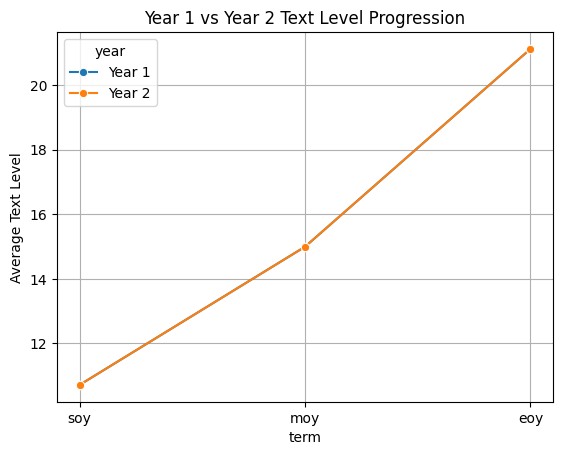

In [130]:
sns.lineplot(data=avg_combined, x='term', y='Average Text Level', hue='year', marker='o')

plt.title("Year 1 vs Year 2 Text Level Progression")
plt.grid(True)
plt.show()

-The learning trajectory from Start → Mid → End is almost identical in average values.

In [131]:
academics.columns
academics.loc[:,['Counting-01', 'Counting-02']].describe()

,Counting-01,Counting-02
count,2000.000000,2000.000000
mean,1.758000,2.850500
std,0.935881,1.072719
min,0.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,3.000000
75%,2.000000,4.000000
max,5.000000,6.000000


Since the dataset does not explicitly mention the scoring range for the Counting assessments, we are assuming a working range of 0 to 6. This decision is based on the fact that the maximum observed scores for both Counting-01 and Counting-02 align with this range across both academic years, indicating consistency in assessment structure.

- We also observe a notable improvement in the mean counting scores between Year 1 and Year 2:

  + The mean increased from 1.75 in Year 1 to 2.85 in Year 2.

  + This indicates a significant positive shift in student performance, suggesting enhanced understanding or improved instruction in numeracy-related tasks.

In [132]:
academics.columns
# Place Value-01	Place Value-02	Addition and Subtraction-01	Addition and Subtraction-02	Multiplication and Division-01	Multiplication and Division-0

Index(['StudentID', 'TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY',
       'TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY',
       'WritingVocab-01-SOY', 'HRSIW-01-SOY', 'Counting-01', 'Counting-02',
       'Place Value-01', 'Place Value-02', 'Addition and Subtraction-01',
       'Addition and Subtraction-02', 'Multiplication and Division-01',
       'Multiplication and Division-02', 'Year_02', 'At_Risk_Numeracy'],
      dtype='object')

In [133]:
 # accessing all mathematical related columns all at once
 academics.loc[:,['Counting-01', 'Counting-02','Place Value-01', 'Place Value-02', 'Addition and Subtraction-01',
       'Addition and Subtraction-02', 'Multiplication and Division-01',
       'Multiplication and Division-02']].describe()

,Counting-01,Counting-02,Place Value-01,Place Value-02,Addition and Subtraction-01,Addition and Subtraction-02,Multiplication and Division-01,Multiplication and Division-02
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.758000,2.850500,1.028500,1.681500,1.290500,2.257500,1.075500,1.797500
std,0.935881,1.072719,0.529932,0.639736,0.935172,1.155795,0.837944,0.771875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000
50%,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,2.000000,4.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000
max,5.000000,6.000000,4.000000,5.000000,5.000000,6.000000,4.000000,5.000000


- Across all six math skills, there's a noticeable improvement from Year 1 to Year 2.

- This is evident by the increase in mean scores for every topic.



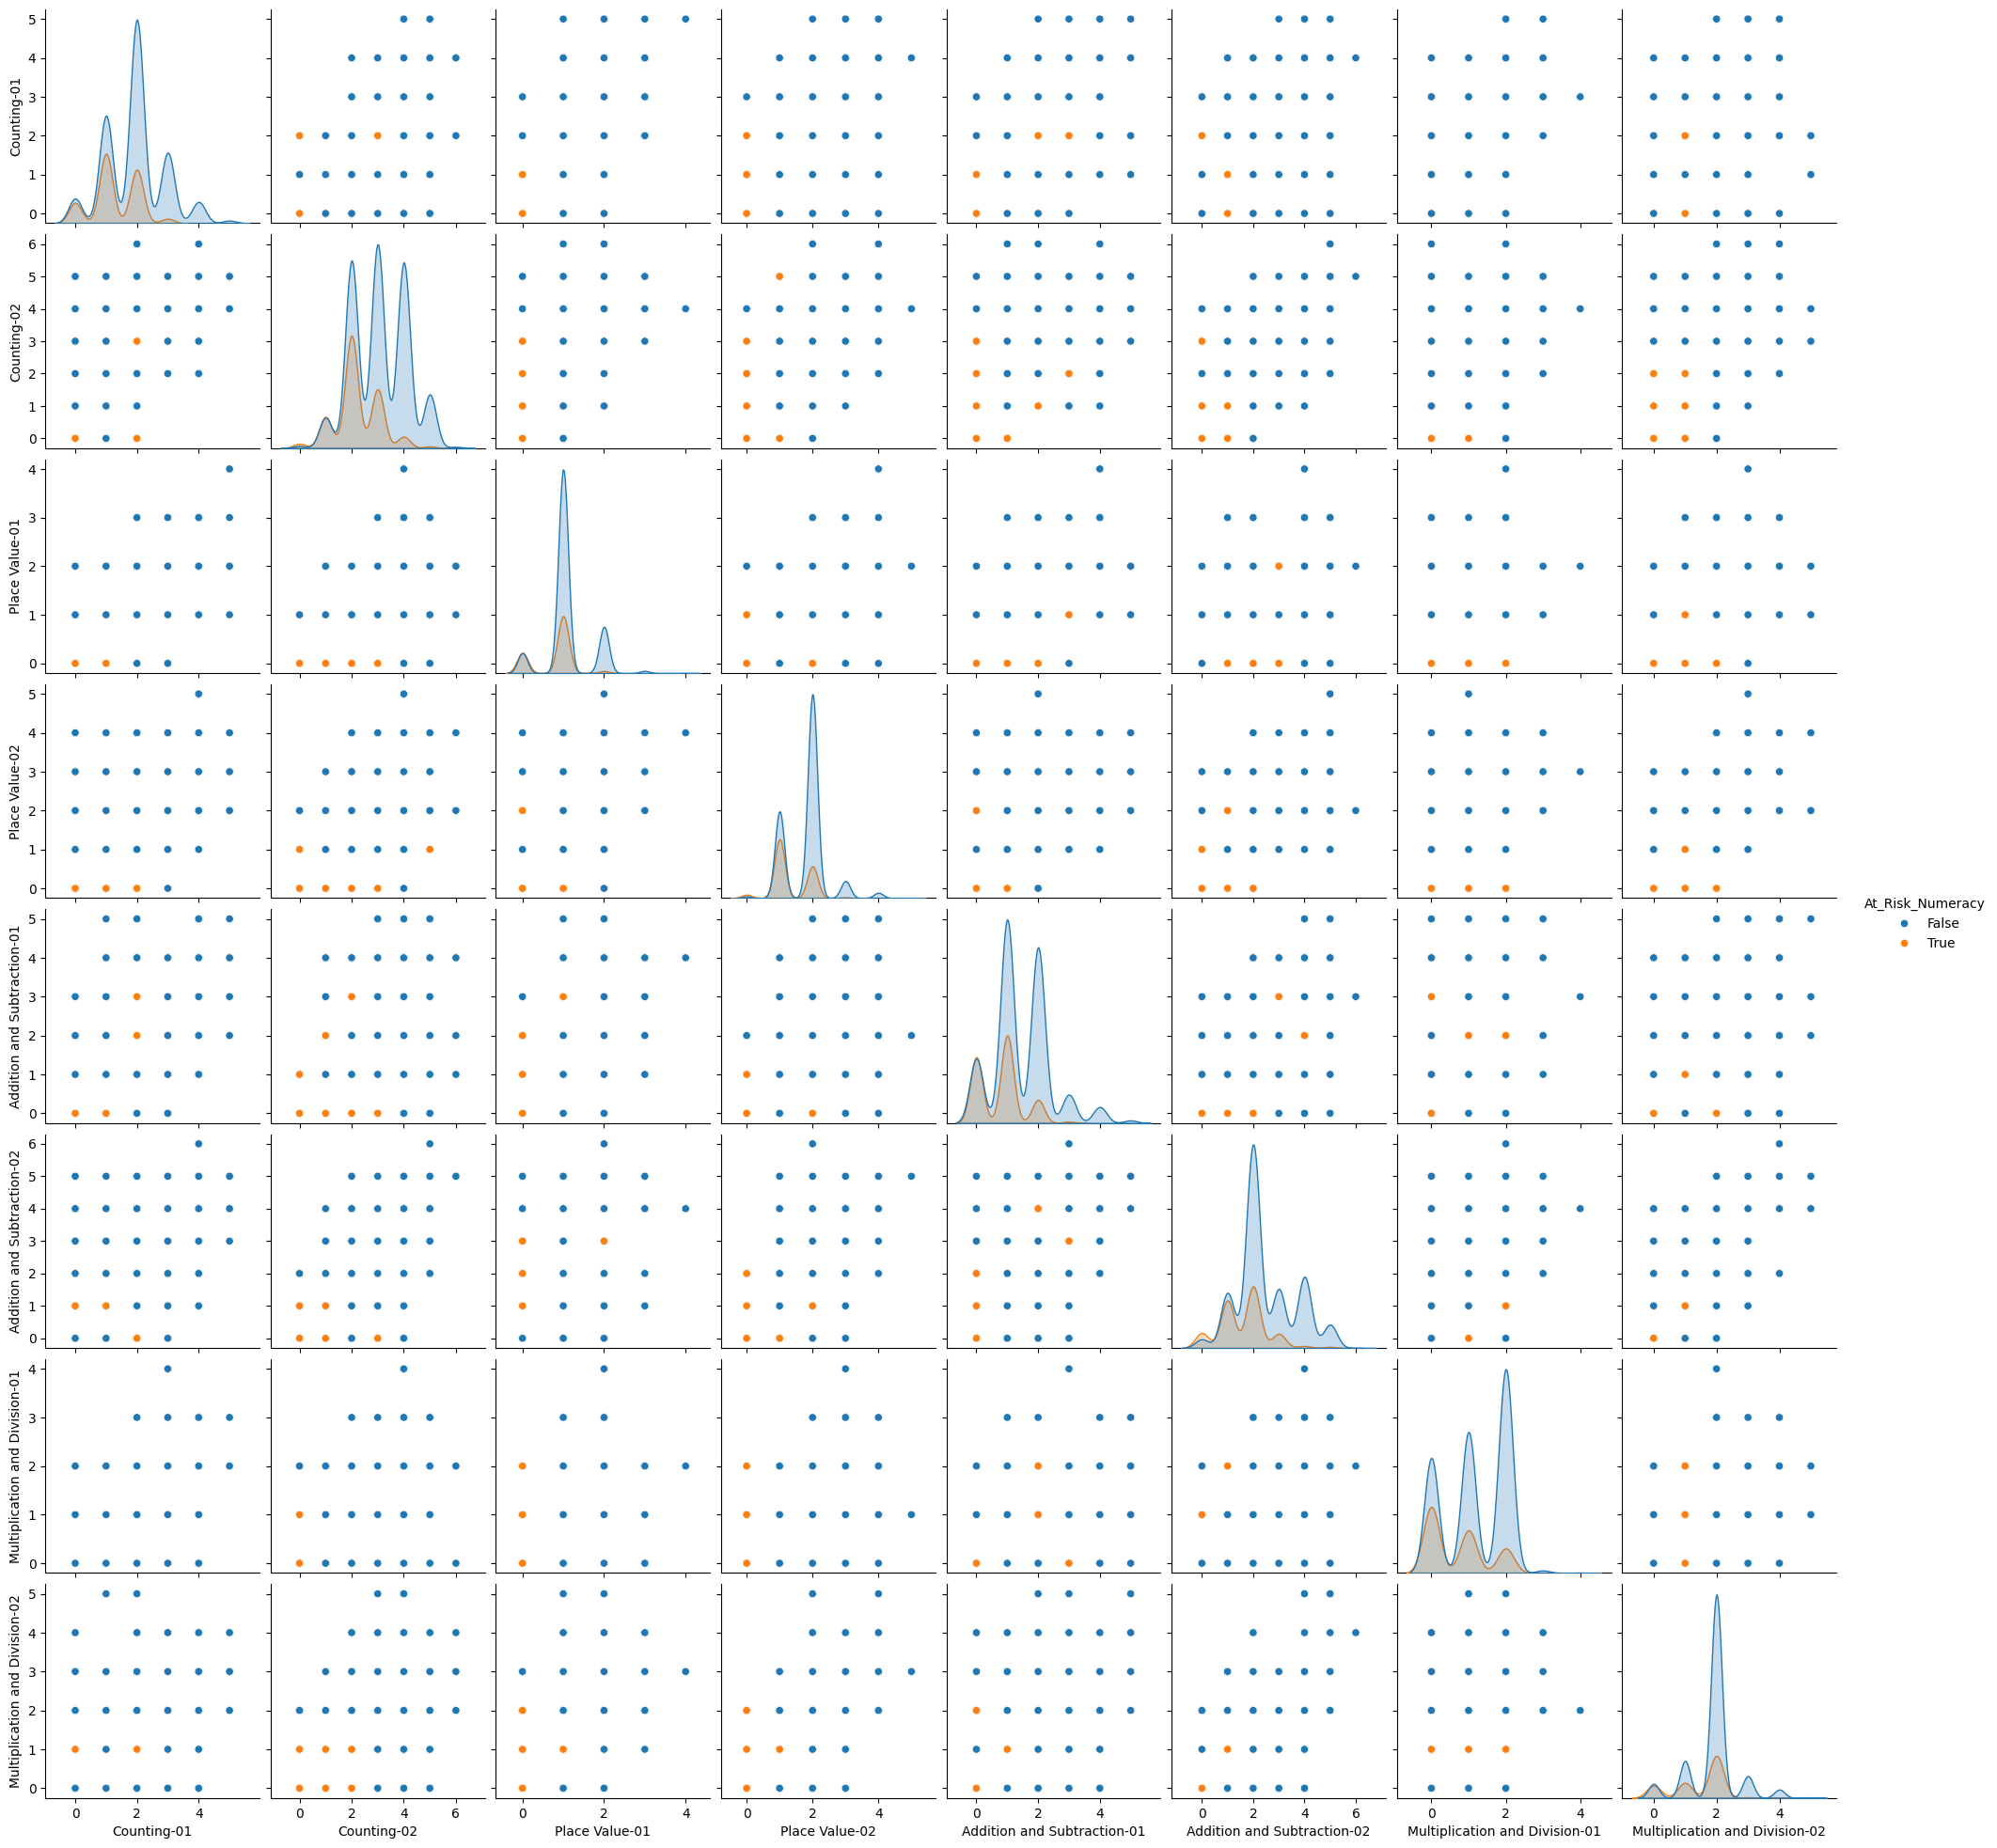

In [134]:
sns.pairplot(academics.loc[:,['Counting-01', 'Counting-02','Place Value-01', 'Place Value-02', 'Addition and Subtraction-01',
       'Addition and Subtraction-02', 'Multiplication and Division-01',
       'Multiplication and Division-02','At_Risk_Numeracy']],hue='At_Risk_Numeracy')

- Students "At Risk" (orange) mostly cluster on the lower end of each skill, as expected.

- Distributions are right-skewed for most skills — majority score low, few score high.

In [135]:
# TRYING TO FIGURE OUT BEST FEATURES FOR OUR MODEL

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
x = academics.iloc[:,1:-1]
y = academics.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [136]:
print('Number of rows for training\t',x_train.shape[0])
print('Number of rows for testing\t',x_test.shape[0])

Number of rows for training	 1600
Number of rows for testing	 400


In [137]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
#     # 'max_features': ['sqrt', 'log2']
# }

# rfc = RandomForestClassifier(random_state=42)


# grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid,
#                            cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
# grid_search.fit(x_train, y_train)

In [138]:
rfc = RandomForestClassifier(max_depth=20,random_state=42,min_samples_leaf=2,n_estimators=100)
rfc

RandomForestClassifier(max_depth=20, min_samples_leaf=2, random_state=42)

In [139]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, random_state=42)

In [140]:
y_pred = rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.8

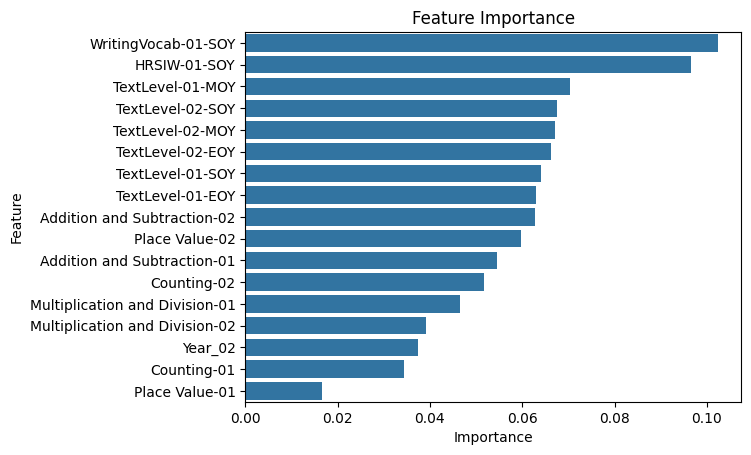

In [141]:
rfc.feature_importances_
rfc.feature_names_in_
importance_df = pd.DataFrame({
    'Feature': rfc.feature_names_in_,
    'Importance': rfc.feature_importances_
})
sns.barplot(data=importance_df.sort_values(by='Importance', ascending=False), x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

- **Literacy drives numeracy:** Early reading and vocabulary (HRSIW, WritingVocab, TextLevel) are stronger predictors than math-specific scores.

- **Math still matters:** Addition/Subtraction and Counting also play key roles but come after literacy measures.

- **Multiplication & Place Value are less important —** possibly due to later exposure or uniform difficulty.

- **Temporal relevance:** SOY and MOY metrics (Start/Mid of Year) are more impactful than EOY — early indicators matter most.



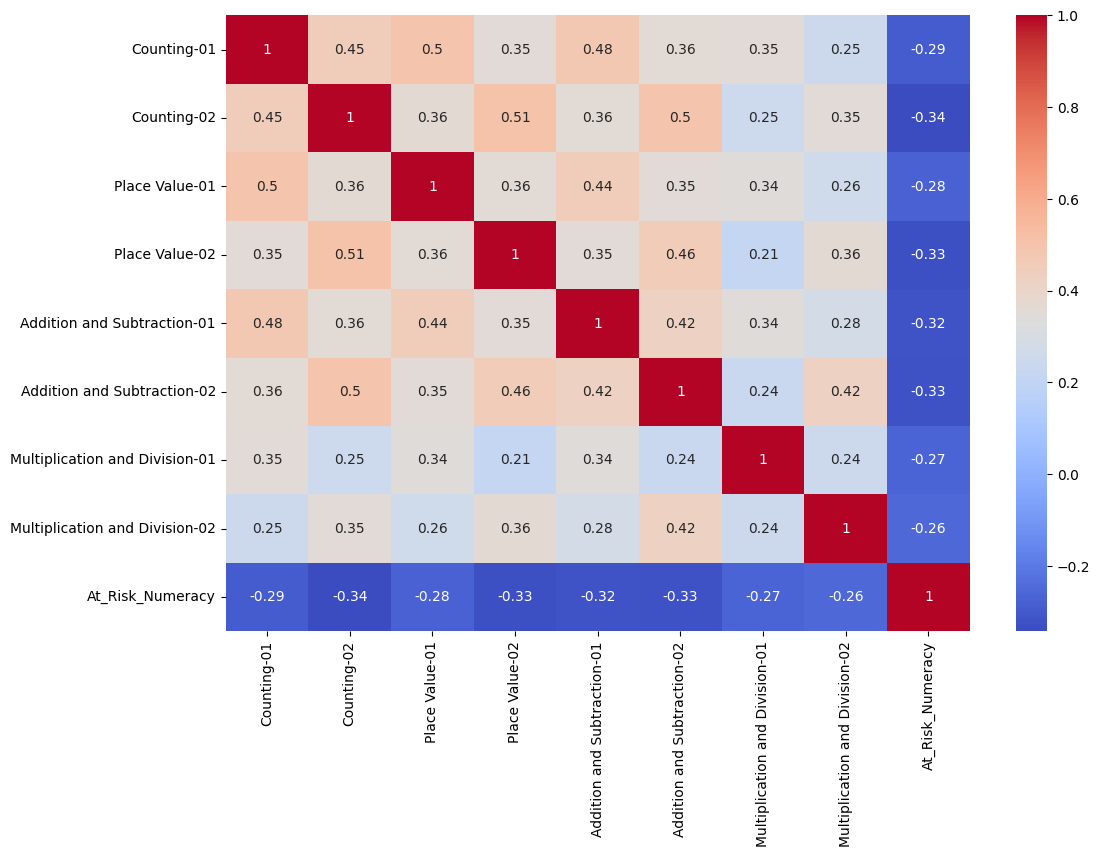

In [142]:
plt.figure(figsize=(12,8))
sns.heatmap(academics.loc[:,['Counting-01', 'Counting-02','Place Value-01', 'Place Value-02', 'Addition and Subtraction-01',
       'Addition and Subtraction-02', 'Multiplication and Division-01',
       'Multiplication and Division-02','At_Risk_Numeracy']].corr(),annot=True,cmap='coolwarm')
plt.show()

In [143]:
academics.loc[:,['Counting-01', 'Counting-02','Place Value-01', 'Place Value-02', 'Addition and Subtraction-01',
       'Addition and Subtraction-02', 'Multiplication and Division-01',
       'Multiplication and Division-02','At_Risk_Numeracy']].corr().loc[:,'At_Risk_Numeracy'].sort_values(ascending=False)

,At_Risk_Numeracy
At_Risk_Numeracy,1.000000
Multiplication and Division-02,-0.258493
Multiplication and Division-01,-0.267057
Place Value-01,-0.279521
Counting-01,-0.292486
Addition and Subtraction-01,-0.317718
Addition and Subtraction-02,-0.326522
Place Value-02,-0.329940
Counting-02,-0.342658


In [144]:
# Counting-02, Place Value-02, Addition and Subtraction-02
# according to correlations these columns are performing better

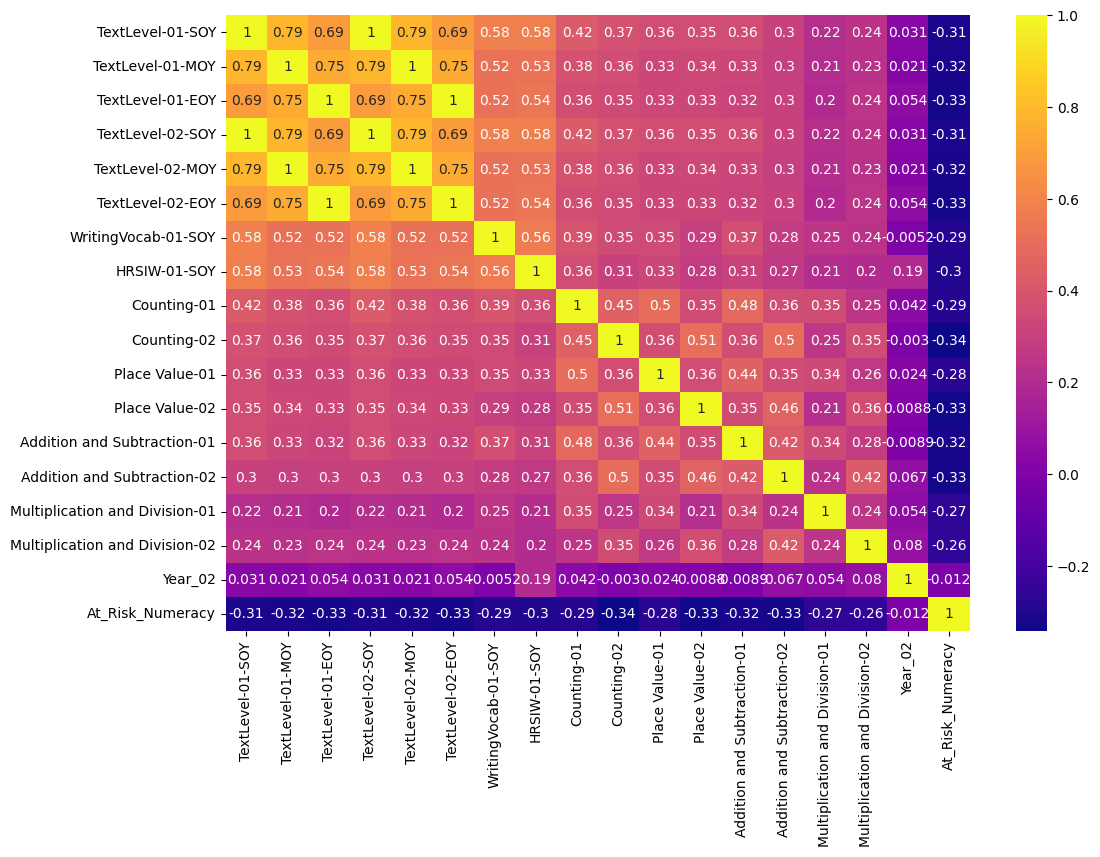

In [145]:
# academics.drop()
academics.columns
plt.figure(figsize=(12,8))
sns.heatmap(academics.loc[:,['TextLevel-01-SOY', 'TextLevel-01-MOY', 'TextLevel-01-EOY',
       'TextLevel-02-SOY', 'TextLevel-02-MOY', 'TextLevel-02-EOY',
       'WritingVocab-01-SOY', 'HRSIW-01-SOY', 'Counting-01', 'Counting-02',
       'Place Value-01', 'Place Value-02', 'Addition and Subtraction-01',
       'Addition and Subtraction-02', 'Multiplication and Division-01',
       'Multiplication and Division-02', 'Year_02', 'At_Risk_Numeracy']].corr(),annot=True,cmap='plasma')
plt.show()

- we can see that their is a case of multicollinearity in text level year 01 and year 02
- so we are going to pick one from each year, which is performing better with at_risk_numeracy
- Text_level_01-eoy and Text_level_02-eoy

# High Priority Features (Strong signal from both importance + correlation)
- WritingVocab-01-SOY

- HRSIW-01-SOY

- TextLevel-02-MOY

- TextLevel-02-EOY

- Addition and Subtraction-02

- Counting-02

# Medium Priority (Helpful, but not as strong)
- TextLevel-01-MOY

- TextLevel-01-EOY

- Multiplication and Division-02

- Place Value-02

In [147]:
# saving academics dataset
academics.to_csv('academics.csv',index=False)

In [155]:
df
# parents dataset

df.columns
parents = df.loc[:,['StudentID', '01.SES', '02.SES', 'NumAbvYear9',
       'NumAbvDiploma', 'NumProf', 'At_Risk_Numeracy']]

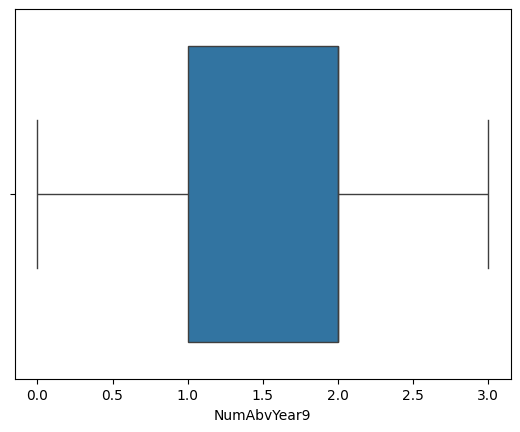

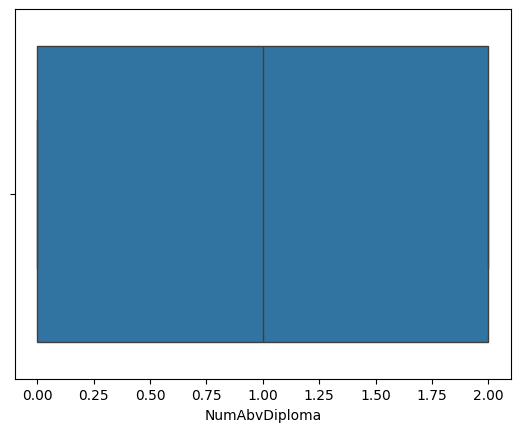

,StudentID,01.SES,02.SES,NumAbvYear9,NumAbvDiploma,NumProf
count,2.000000e+03,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.459580e+08,102.9415,102.117500,1.564000,0.886500,0.766500
std,2.580928e+08,9.3859,9.150167,0.725374,0.837836,0.811977
min,1.006692e+08,78.0000,78.000000,0.000000,0.000000,0.000000
25%,3.163839e+08,95.0000,95.000000,1.000000,0.000000,0.000000
50%,5.469370e+08,101.0000,101.000000,2.000000,1.000000,1.000000
75%,7.670611e+08,113.0000,109.000000,2.000000,2.000000,1.000000
max,9.998723e+08,120.0000,120.000000,3.000000,2.000000,2.000000


In [163]:
sns.boxplot(data=parents,x='NumAbvYear9')
plt.show()
sns.boxplot(data=parents,x='NumAbvDiploma')
plt.show()
parents .describe()


### NumAbvYear9 (Parents with education above Year 9)

- Values range from 0 to 3, which means some students have no parent educated above Year 9, while some have both (or even possibly a third guardian/parent figure) who are.

- The majority of students lie between 1 and 2, with a strong concentration at 2.

- No outliers present, and the distribution is clean.

### NumAbvDiploma (Parents with qualification above diploma)
- Values range from 0 to 2 (no third value like in NumAbvYear9).

- The median is at 1, meaning more than half the students have at least one parent with a diploma-level qualification or higher.

<Axes: xlabel='NumAbvYear9', ylabel='count'>

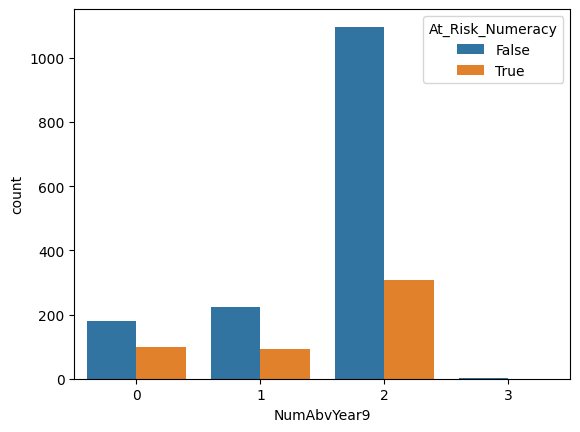

In [166]:
sns.countplot(data=parents,x='NumAbvYear9',hue='At_Risk_Numeracy')

We can clearly see that students with 2 parents educated above Year 9 are less likely to be at risk. Most bars under “2” are blue (False) — showing better numeracy outcomes.


- This confirms a pattern: more educated parents → less likelihood of numeracy risk.

<Axes: xlabel='NumAbvDiploma', ylabel='count'>

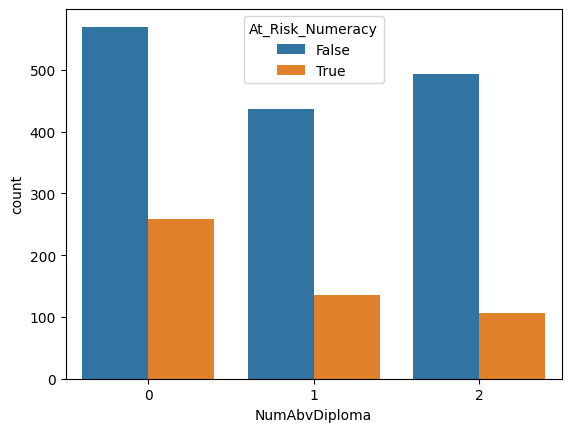

In [167]:
sns.countplot(data=parents,x='NumAbvDiploma',hue='At_Risk_Numeracy')

- students with no parents having qualifications above diploma have more orange (at risk) cases.

- When one or both parents are qualified beyond diploma, numeracy risk drops noticeably.

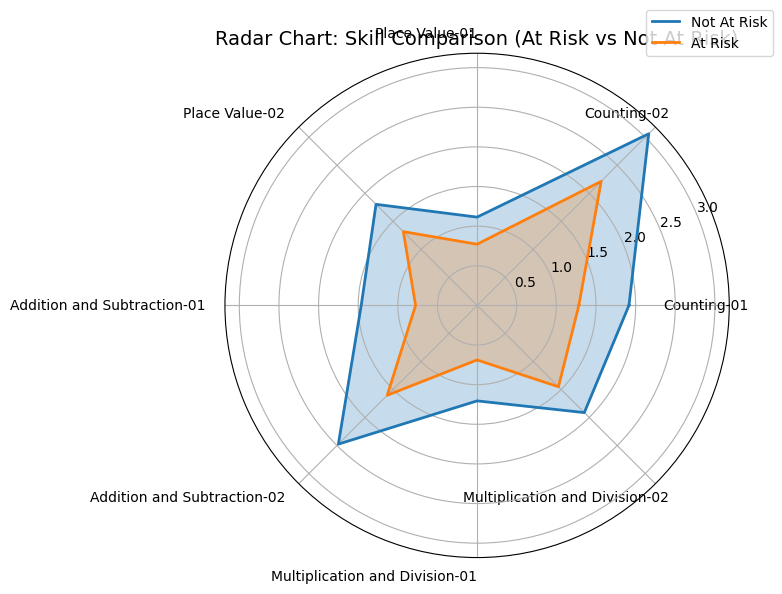

In [172]:
df.columns
features = [
    'Counting-01', 'Counting-02',
    'Place Value-01', 'Place Value-02',
    'Addition and Subtraction-01', 'Addition and Subtraction-02',
    'Multiplication and Division-01', 'Multiplication and Division-02'
]

grouped = df.groupby('At_Risk_Numeracy')[features].mean()

## CODED FROM AI

# Labels for axes
labels = features
num_vars = len(labels)

# Angles for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Data for radar chart
risk = grouped.loc[True].tolist()
no_risk = grouped.loc[False].tolist()
risk += risk[:1]       # to close the loop
no_risk += no_risk[:1]

# Plotting
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

ax.plot(angles, no_risk, label='Not At Risk', linewidth=2)
ax.fill(angles, no_risk, alpha=0.25)

ax.plot(angles, risk, label='At Risk', linewidth=2)
ax.fill(angles, risk, alpha=0.25)

# Labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, rotation=30, ha='right')

# Title & legend
ax.set_title("Radar Chart: Skill Comparison (At Risk vs Not At Risk)", size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.tight_layout()
plt.show()


In [173]:
df.to_csv('clean_data_after_eda',index=False)